In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import tensorflow as tf

from xgboost import XGBRegressor as xgb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data/Bikeshare/hour.csv", header=0, sep=',')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
train_idx = np.where(df['dteday'].values < '2012-07-01')[0]
test_idx = np.where(df['dteday'].values >= '2012-07-01')[0]

In [4]:
df['dteday'] = [sorted(set(df['dteday'].values)).index(x) for x in df['dteday'].values]
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
Y = df['cnt'].values
X = df.drop(['cnt', 'instant', 'casual', 'registered'], axis=1)
print(X.head())
X = X.values

   dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0       0       1   0     1   0        0        6           0           1   
1       0       1   0     1   1        0        6           0           1   
2       0       1   0     1   2        0        6           0           1   
3       0       1   0     1   3        0        6           0           1   
4       0       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  


In [16]:
split_time = True
if split_time:
    X_train = X[train_idx]
    X_test  = X[test_idx]
    Y_train = Y[train_idx]
    Y_test  = Y[test_idx]
    X_query = X.copy()
else:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    X_query = X.copy()

In [17]:
Y_mean = np.mean(Y_train)
Y_std  = np.std(Y_train)
Y_train = (Y_train - Y_mean) / Y_std
Y_test  = (Y_test  - Y_mean) / Y_std

X_means = np.mean(X_train, axis=0)
X_stds = np.std(X_train, axis=0)
X_train = (X_train - X_means) / X_stds
X_test = (X_test - X_means) / X_stds

In [18]:
print(Y_train.shape, Y_test.shape)

(13003,) (4376,)


In [19]:
print(Y_train)
print(Y_test)
print(np.std(Y_train))
print(np.std(Y_test))

[-0.94361305 -0.79434011 -0.84409775 ...  0.28166902  0.02666108
 -0.09773304]
[-0.11639216 -0.46469569 -0.48335481 ... -0.48335481 -0.66372628
 -0.73836275]
1.0
1.3664198073290525


In [56]:
xgb1 = xgb(max_depth=1, n_estimators=2000)
xgb1.fit(X_train, Y_train)
print(np.mean(np.square(Y_train - xgb1.predict(X_train))))
print(np.mean(np.square(Y_test - xgb1.predict(X_test))))

0.291825726095841
0.8398885664517867


In [57]:
xgb2 = xgb(max_depth=2, n_estimators=1000)
xgb2.fit(X_train, Y_train)
print(np.mean(np.square(Y_train - xgb2.predict(X_train))))
print(np.mean(np.square(Y_test - xgb2.predict(X_test))))

0.138394253908292
0.5167277562993031


In [58]:
xgb3 = xgb(max_depth=3, n_estimators=1000)
xgb3.fit(X_train, Y_train)
print(np.mean(np.square(Y_train - xgb3.predict(X_train))))
print(np.mean(np.square(Y_test - xgb3.predict(X_test))))

0.04979640057972824
0.29513703662409957


In [59]:
xgb4 = xgb(max_depth=4, n_estimators=1000)
xgb4.fit(X_train, Y_train)
print(np.mean(np.square(Y_train - xgb4.predict(X_train))))
print(np.mean(np.square(Y_test - xgb4.predict(X_test))))

0.02554988638705647
0.24579002239462971


In [30]:
print(np.var(Y_train))
print(np.var(Y_test))

1.0000000000000002
1.867103089861165


In [25]:
def build_model(activation, dropout_rate=0.0, n_hidden=128):
    # TODO: More layers? Different archs?
    print("Building model with {} activation and {:.3f} dropout".format(activation, dropout_rate))
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(13,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_hidden, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_hidden, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_hidden, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(n_hidden, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation=tf.identity)
    ])
    sgd = tf.keras.optimizers.Adam(lr=1e-3)#, decay=1e-6, momentum=0.9, nesterov=True)
    if activation == 'sigmoid':
        model.compile(
                      loss='MSE',
                      metrics=['mse'],
                     optimizer=sgd)
    else:
        model.compile(
              loss='MSE',
              metrics=['mse'],
                     optimizer=sgd)
    return model

In [60]:
max_epoch = 500
with open("results/results_bikeshare_128.tsv", 'a') as results_file:
    for fit_iter in range(3):
        for dropout_rate in [0.0, 0.05, 0.125, 0.25, 0.375, 0.5]:
            model = build_model('sigmoid', dropout_rate, 128)
            epoch = 0
            while epoch < max_epoch:
                print(dropout_rate, fit_iter, epoch)
                pred_train = model(X_train, training=False).numpy()
                pred_test  = model(X_test, training=False).numpy()
                pred_query = model(X_query, training=False).numpy()
                xgb1 = xgb(max_depth=1, n_estimators=1000)
                xgb2 = xgb(max_depth=2, n_estimators=1000)
                xgb3 = xgb(max_depth=3, n_estimators=1000)

                xgb1.fit(X_test, pred_test)
                xgb1_preds = xgb1.predict(X_test)

                xgb2.fit(X_test, pred_test)
                xgb2_preds = xgb2.predict(X_test)

                xgb3.fit(X_test, pred_test)
                xgb3_preds = xgb3.predict(X_test)

                xgb1_var = np.var(xgb1_preds)
                xgb2_var = np.var(xgb1_preds - xgb2_preds)
                xgb3_var = np.var(xgb2_preds - xgb3_preds)

                train_mse = np.mean(np.square(Y_train - np.squeeze(model(X_train, training=False).numpy())))
                val_mse = np.mean(np.square(Y_test - np.squeeze(model(X_test, training=False).numpy())))

                print(xgb1_var, xgb2_var, xgb3_var, train_mse, val_mse)
                print('{:.3f}\t{:d}\t{:d}\t{}\t{}\t{}\t{}\t{}'.format(
                                dropout_rate, fit_iter+2, epoch,
                    xgb1_var, xgb2_var, xgb3_var, train_mse, val_mse),
                    file=results_file, flush=True)
                if epoch < 50:
                    model.fit(X_train, Y_train, epochs=5, verbose=1)
                    epoch += 5
                elif epoch < max_epoch:
                    model.fit(X_train, Y_train, epochs=25, verbose=0)
                    epoch += 25

Building model with sigmoid activation and 0.000 dropout
0.0 0 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

3.011575e-06 1.1730004e-08 6.967876e-09 1.3417462996397012 3.127217302685323
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 89us/sample - loss: 0.7233 - mse: 0.7233
Epoch 2/5
13003/13003 [==============================] - 1s 74us/sample - loss: 0.6097 - mse: 0.6097
Epoch 3/5
13003/13003 [==============================] - 1s 55us/sample - loss: 0.6005 - mse: 0.6005
Epoch 4/5
13003/13003 [=================

0.0 0 425
0.9816805 0.19967252 0.11020377 0.016204562627547422 0.30108086872479617
0.0 0 450
1.0455962 0.20893724 0.09539155 0.0178087516960296 0.2982684877846089
0.0 0 475
1.0539359 0.22104819 0.095842905 0.014894483634738182 0.293503205450913
Building model with sigmoid activation and 0.050 dropout
0.05 0 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

1.441074e-06 1.003799e-08 4.4356963e-09 1.2319988541270008 1.8704885495935852
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 78us/sample - loss: 0.7429 - mse: 0.

0.05 0 375
0.8163718 0.14618123 0.06308964 0.03824791389239821 0.3293885365171417
0.05 0 400
0.7220243 0.16150023 0.052256644 0.04540639804750721 0.4273269518197794
0.05 0 425
0.77184695 0.12386516 0.061992053 0.039552473413843964 0.3841679527187933
0.05 0 450
0.88013774 0.14197761 0.07372415 0.036091498061698854 0.3461116640019691
0.05 0 475
0.8295229 0.14727496 0.05047323 0.03561896575091609 0.3507056557561654
Building model with sigmoid activation and 0.125 dropout
0.125 0 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2.3332777e-06 1.0930964e-

0.125 0 300
0.70992893 0.114390485 0.07970229 0.1834216517765748 0.6774035999036083
0.125 0 325
0.7621325 0.11456015 0.078350134 0.17993744583317553 0.5909834298512652
0.125 0 350
0.71619433 0.11840513 0.07425235 0.19250374012401816 0.6568881330187369
0.125 0 375
0.71135294 0.14237176 0.07386554 0.16530277036406404 0.5873056437915629
0.125 0 400
0.7660814 0.13639398 0.072346345 0.19399562017962219 0.6317327064262556
0.125 0 425
0.6963667 0.117155865 0.07071668 0.16001606341559366 0.6369805237682861
0.125 0 450
0.70636314 0.13004535 0.08671193 0.21166386964384099 0.6934059903676455
0.125 0 475
0.72856206 0.12457312 0.071034074 0.16225657531843526 0.6186013839351883
Building model with sigmoid activation and 0.250 dropout
0.25 0 0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.kera

0.25 0 225
0.7162065 0.14236598 0.07743611 0.5767659030503072 1.2196838770212317
0.25 0 250
0.647318 0.12221185 0.065250404 0.5529604450479593 1.1661852942793125
0.25 0 275
0.7748517 0.14183578 0.08381873 0.5968756422139337 1.163538039423589
0.25 0 300
0.6710045 0.1223993 0.07153831 0.5260033846798361 1.1785643397992849
0.25 0 325
0.70502883 0.14518121 0.07325665 0.590421805557008 1.26856051094355
0.25 0 350
0.6642938 0.122583196 0.07409686 0.5173498083875392 1.1329275408442785
0.25 0 375
0.68450254 0.122221015 0.07653083 0.5657934043466434 1.1728435305774099
0.25 0 400
0.5882972 0.11621595 0.059905503 0.512833912816514 1.1965067671496192
0.25 0 425
0.6476149 0.13325807 0.061747607 0.5481885297526371 1.1852802096557402
0.25 0 450
0.7120792 0.15786698 0.07283409 0.6053131285906173 1.2079669978510819
0.25 0 475
0.71980053 0.16009563 0.06726426 0.5451415426930764 1.1492674097310263
Building model with sigmoid activation and 0.375 dropout
0.375 0 0

If you intended to run this layer in flo

0.375 0 175
0.58108896 0.10912955 0.043317452 0.9950690873977954 1.9413095610038913
0.375 0 200
0.65504247 0.12302247 0.052638713 1.0389270705782674 1.9645719152031949
0.375 0 225
0.5865352 0.117578566 0.05701015 1.035515600380847 1.9941399280242076
0.375 0 250
0.5459232 0.102074794 0.04434771 0.96150763072686 1.9031615889737254
0.375 0 275
0.49982017 0.09268932 0.046118017 0.9169108147627301 1.8489324254453212
0.375 0 300
0.5053896 0.104945466 0.05256628 0.997737643885066 2.008547710700522
0.375 0 325
0.55206734 0.11490978 0.047800686 0.9548324748701443 1.7996023275254853
0.375 0 350
0.65254605 0.11576554 0.06463111 0.9694567695232302 1.8561179790134572
0.375 0 375
0.5760461 0.11925466 0.054137234 0.9759659485010046 1.9398692127691914
0.375 0 400
0.6290839 0.13289982 0.061544575 1.0321323530845072 1.9373290633551479
0.375 0 425
0.67382884 0.1560358 0.06021769 1.1188865156322227 1.9610592807360885
0.375 0 450
0.59762615 0.14392854 0.06753017 1.0317700337946094 1.9870014954512063
0.375 

0.5 0 100
0.3178136 0.053222984 0.0053688157 1.0396262047841176 2.042436288510358
0.5 0 125
0.28143913 0.047525857 0.007528303 1.0116881539136426 2.012191200273963
0.5 0 150
0.3947315 0.07002125 0.011141307 1.1048099803041058 2.133518905179189
0.5 0 175
0.40674642 0.0559459 0.009952498 1.1803527733809671 2.2912935963218124
0.5 0 200
0.33658266 0.05750735 0.009063613 1.0965857697132726 2.204674550634292
0.5 0 225
0.3987556 0.059384055 0.012881907 1.171175094928873 2.315433452963027
0.5 0 250
0.361295 0.07167074 0.014034998 1.2010870448951048 2.331804116068741
0.5 0 275
0.33402857 0.06215275 0.009967584 1.2088070224588063 2.37427680046057
0.5 0 300
0.44286802 0.07801159 0.013847403 1.2125427494882792 2.39265225470027
0.5 0 325
0.41042778 0.07129063 0.010428802 1.1397949542268735 2.2307550413072064
0.5 0 350
0.4239903 0.08702142 0.017152973 1.2448205395294485 2.3855179836428215
0.5 0 375
0.38502306 0.08068896 0.019316142 1.1758924323832691 2.298020294504137
0.5 0 400
0.42224404 0.07850993

0.0 1 50
0.8873391 0.12700328 0.07015193 0.06476318481782659 0.27213757908717323
0.0 1 75
0.8051168 0.1529818 0.068502605 0.046543043945035854 0.32597613233974987
0.0 1 100
0.74560946 0.14050524 0.08313402 0.04095486090914924 0.35294867543791586
0.0 1 125
0.73404634 0.15657093 0.08917766 0.03572511131900856 0.3855160627709359
0.0 1 150
0.7815783 0.1623483 0.08147987 0.035099267538463756 0.3512136571334093
0.0 1 175
0.7799839 0.1610896 0.08202495 0.034765613857499315 0.35114338994254773
0.0 1 200
0.77543277 0.17043856 0.06975253 0.03284442268268179 0.35165048015682304
0.0 1 225
0.79417336 0.15731287 0.077721156 0.03726612785525165 0.3363869714064131
0.0 1 250
0.8888642 0.16768387 0.09058762 0.023677058395310032 0.2578914817857224
0.0 1 275
1.0450443 0.16839325 0.109901085 0.021892291952014805 0.21240686973954967
0.0 1 300
0.98263353 0.1801484 0.10191023 0.020634117633913936 0.2357565306732338
0.0 1 325
1.086854 0.18021709 0.122366145 0.021499901484151804 0.20837755638382893
0.0 1 350
0.

13003/13003 [==============================] - 1s 52us/sample - loss: 0.2529 - mse: 0.2529
0.125 1 45
0.89308447 0.10549886 0.04057703 0.1680224221819033 0.5496372634371108
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 71us/sample - loss: 0.2412 - mse: 0.2412
Epoch 2/5
13003/13003 [==============================] - 1s 52us/sample - loss: 0.2436 - mse: 0.2436
Epoch 3/5
13003/13003 [==============================] - 1s 65us/sample - loss: 0.2525 - mse: 0.2525
Epoch 4/5
13003/13003 [==============================] - 1s 62us/sample - loss: 0.2349 - mse: 0.2349
Epoch 5/5
13003/13003 [==============================] - 1s 70us/sample - loss: 0.2402 - mse: 0.2402
0.125 1 50
0.82560986 0.10442355 0.059629884 0.19574147224262078 0.6316840393259776
0.125 1 75
0.81871206 0.10340184 0.05340664 0.16118282192403327 0.5137248626024236
0.125 1 100
0.90278834 0.13067769 0.060377724 0.1938797647420851 0.513607027270685
0.125 1 125
0.6340219 0.08795445 0.052299865 0.17

Epoch 3/5
13003/13003 [==============================] - 1s 63us/sample - loss: 0.3729 - mse: 0.3729
Epoch 4/5
13003/13003 [==============================] - 1s 55us/sample - loss: 0.3877 - mse: 0.3877
Epoch 5/5
13003/13003 [==============================] - 1s 56us/sample - loss: 0.3676 - mse: 0.3676
0.25 1 45
0.6956607 0.08153936 0.028709987 0.43871550963221845 1.13621285702809
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 51us/sample - loss: 0.3617 - mse: 0.3617
Epoch 2/5
13003/13003 [==============================] - 1s 54us/sample - loss: 0.3731 - mse: 0.3731
Epoch 3/5
13003/13003 [==============================] - 1s 52us/sample - loss: 0.3753 - mse: 0.3753
Epoch 4/5
13003/13003 [==============================] - 1s 55us/sample - loss: 0.3656 - mse: 0.3656
Epoch 5/5
13003/13003 [==============================] - 1s 62us/sample - loss: 0.3671 - mse: 0.3671
0.25 1 50
0.648812 0.08235985 0.02404262 0.47531904088533383 1.2324392250674754
0.25 1 75

13003/13003 [==============================] - 1s 63us/sample - loss: 0.5077 - mse: 0.5077
Epoch 2/5
13003/13003 [==============================] - 1s 53us/sample - loss: 0.5130 - mse: 0.5130
Epoch 3/5
13003/13003 [==============================] - 1s 54us/sample - loss: 0.4988 - mse: 0.4988
Epoch 4/5
13003/13003 [==============================] - 1s 56us/sample - loss: 0.4843 - mse: 0.4843
Epoch 5/5
13003/13003 [==============================] - 1s 54us/sample - loss: 0.5047 - mse: 0.5047
0.375 1 45
0.49240395 0.05605495 0.014223962 0.6206147459033018 1.4146039754671023
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 52us/sample - loss: 0.5020 - mse: 0.5020
Epoch 2/5
13003/13003 [==============================] - 1s 59us/sample - loss: 0.4952 - mse: 0.4952
Epoch 3/5
13003/13003 [==============================] - 1s 72us/sample - loss: 0.4863 - mse: 0.4863
Epoch 4/5
13003/13003 [==============================] - 1s 67us/sample - loss: 0.4810 - mse: 0.

13003/13003 [==============================] - 1s 58us/sample - loss: 0.0651 - mse: 0.0651
Epoch 4/5
13003/13003 [==============================] - 1s 50us/sample - loss: 0.0657 - mse: 0.0657
Epoch 5/5
13003/13003 [==============================] - 1s 46us/sample - loss: 0.0654 - mse: 0.0654
0.0 2 40
1.00577 0.16383311 0.07212142 0.07420632901489774 0.22412673319901913
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 51us/sample - loss: 0.0624 - mse: 0.0624
Epoch 2/5
13003/13003 [==============================] - 1s 54us/sample - loss: 0.0639 - mse: 0.0639
Epoch 3/5
13003/13003 [==============================] - 1s 57us/sample - loss: 0.0615 - mse: 0.0615
Epoch 4/5
13003/13003 [==============================] - 1s 51us/sample - loss: 0.0620 - mse: 0.0620
Epoch 5/5
13003/13003 [==============================] - 1s 45us/sample - loss: 0.0620 - mse: 0.0620
0.0 2 45
0.8559191 0.18411006 0.047311287 0.05919696568826775 0.25910245430674117
Train on 13003 sam

13003/13003 [==============================] - 1s 50us/sample - loss: 0.1622 - mse: 0.1622
Epoch 2/5
13003/13003 [==============================] - 1s 51us/sample - loss: 0.1592 - mse: 0.1592
Epoch 3/5
13003/13003 [==============================] - 1s 59us/sample - loss: 0.1631 - mse: 0.1631
Epoch 4/5
13003/13003 [==============================] - 1s 58us/sample - loss: 0.1505 - mse: 0.1505
Epoch 5/5
13003/13003 [==============================] - 1s 57us/sample - loss: 0.1619 - mse: 0.1619
0.05 2 40
0.9596597 0.12287791 0.07009942 0.10218503786319924 0.3460709509313739
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 55us/sample - loss: 0.1520 - mse: 0.1520
Epoch 2/5
13003/13003 [==============================] - 1s 55us/sample - loss: 0.1496 - mse: 0.1496
Epoch 3/5
13003/13003 [==============================] - 1s 51us/sample - loss: 0.1556 - mse: 0.1556
Epoch 4/5
13003/13003 [==============================] - 1s 49us/sample - loss: 0.1499 - mse: 0.14

13003/13003 [==============================] - 1s 72us/sample - loss: 0.4041 - mse: 0.4041
Epoch 2/5
13003/13003 [==============================] - 1s 57us/sample - loss: 0.4073 - mse: 0.4073
Epoch 3/5
13003/13003 [==============================] - 1s 70us/sample - loss: 0.3971 - mse: 0.3971
Epoch 4/5
13003/13003 [==============================] - 1s 54us/sample - loss: 0.3960 - mse: 0.3960
Epoch 5/5
13003/13003 [==============================] - 1s 54us/sample - loss: 0.3914 - mse: 0.3914
0.25 2 35
0.74932235 0.097393475 0.032951783 0.45773534395961185 1.1443252311357195
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 49us/sample - loss: 0.3971 - mse: 0.3971
Epoch 2/5
13003/13003 [==============================] - 1s 52us/sample - loss: 0.3892 - mse: 0.3892
Epoch 3/5
13003/13003 [==============================] - 1s 52us/sample - loss: 0.3791 - mse: 0.3791
Epoch 4/5
13003/13003 [==============================] - 1s 52us/sample - loss: 0.3839 - mse: 0

13003/13003 [==============================] - 1s 54us/sample - loss: 0.6799 - mse: 0.6799
Epoch 4/5
13003/13003 [==============================] - 1s 48us/sample - loss: 0.6690 - mse: 0.6690
Epoch 5/5
13003/13003 [==============================] - 1s 49us/sample - loss: 0.6682 - mse: 0.6682
0.5 2 30
0.21924996 0.032896604 0.0020571484 0.6068930908186204 1.338918746899063
Train on 13003 samples
Epoch 1/5
13003/13003 [==============================] - 1s 51us/sample - loss: 0.6642 - mse: 0.6642
Epoch 2/5
13003/13003 [==============================] - 1s 48us/sample - loss: 0.6797 - mse: 0.6797
Epoch 3/5
13003/13003 [==============================] - 1s 50us/sample - loss: 0.6706 - mse: 0.6706
Epoch 4/5
13003/13003 [==============================] - 1s 48us/sample - loss: 0.6616 - mse: 0.6616
Epoch 5/5
13003/13003 [==============================] - 1s 48us/sample - loss: 0.6686 - mse: 0.6686
0.5 2 35
0.24121062 0.034756828 0.0019475244 0.6177896142821553 1.328066307477826
Train on 13003 

In [41]:
print(np.mean(np.square(Y_train - xgb1.predict(X_train))))
print(np.mean(np.square(Y_test - xgb1.predict(X_test))))

0.30551311924184116
0.8065913772010289


In [42]:
print(np.mean(np.square(Y_train - xgb2.predict(X_train))))
print(np.mean(np.square(Y_test - xgb2.predict(X_test))))

0.14644779293972754
0.5713745209092453


(array([1342.,  706.,  756.,  547.,  341.,  266.,  169.,  118.,   96.,
          35.]),
 array([-1.03690864, -0.42986534,  0.17717796,  0.78422126,  1.39126456,
         1.99830785,  2.60535115,  3.21239445,  3.81943775,  4.42648105,
         5.03352435]),
 <a list of 10 Patch objects>)

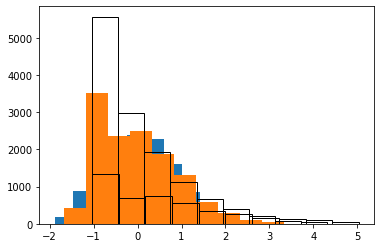

In [45]:
#plt.hist(model(X_train).numpy())
plt.hist(xgb1.predict(X_train))
plt.hist(xgb2.predict(X_train))
plt.hist(Y_train, fill=False)
plt.hist(Y_test, fill=False)

(array([   7.,  134.,  725., 2423., 3098., 3272., 2196.,  903.,  223.,
          22.]),
 array([-1.1371636 , -0.9117448 , -0.6863259 , -0.460907  , -0.23548813,
        -0.01006925,  0.21534963,  0.4407685 ,  0.6661874 ,  0.8916063 ,
         1.1170251 ], dtype=float32),
 <a list of 10 Patch objects>)

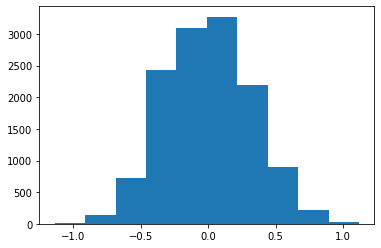

In [46]:
plt.hist(xgb2.predict(X_train) - xgb1.predict(X_train))

In [47]:
np.var(xgb2.predict(X_train) - xgb1.predict(X_train))

0.101641655

In [48]:
np.var(xgb2.predict(X_query) - xgb1.predict(X_query))

0.030938728

(array([ 606., 3437., 4842., 6062.,  812.,  494.,  148.,  628.,  298.,
          52.]),
 array([-0.9000373 , -0.78929144, -0.6785456 , -0.5677998 , -0.45705396,
        -0.3463081 , -0.2355623 , -0.12481646, -0.01407063,  0.0966752 ,
         0.20742103], dtype=float32),
 <a list of 10 Patch objects>)

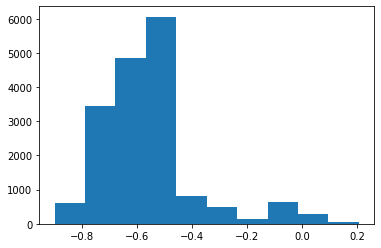

In [49]:
plt.hist(xgb2.predict(X_query) - xgb1.predict(X_query))